# **Задание № 3**

решил использовать готовый пакет [SDV](https://docs.sdv.dev/sdv)

In [ ]:
pip install sdv

In [17]:
import pandas as pd
from sdv.metadata import SingleTableMetadata

from sdv.single_table import TVAESynthesizer
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import get_column_plot

In [3]:
german_credit_df = pd.read_csv('/content/german_credit_data_target - german_credit_data_target.csv')
loans_df = pd.read_csv('/content/loans_full_schema - loans_full_schema.csv')

In [4]:
german_credit_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


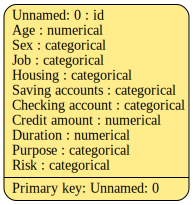

In [25]:
# Метаданные german_credit_df
german_credit_metadata = SingleTableMetadata()
german_credit_metadata.detect_from_dataframe(german_credit_df)
german_credit_metadata.visualize()

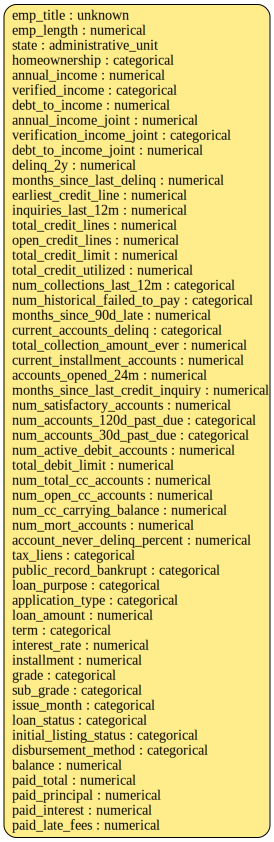

In [26]:
# Метаданные loans_df
loans_metadata = SingleTableMetadata()
loans_metadata.detect_from_dataframe(loans_df)
loans_metadata.visualize()

**TVAE**

In [27]:
synthesizer = TVAESynthesizer(german_credit_metadata)
synthesizer.fit(german_credit_df)
synthetic_data = synthesizer.sample(num_rows=len(german_credit_df) * 100)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:82: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [30]:
print(len(synthetic_data))
synthetic_data.head()

100000


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,415302551,23,male,2,own,little,NaN,826,11,radio/TV,good
1,706041928,30,male,2,own,little,NaN,1493,26,car,good
2,975629174,24,male,2,own,little,moderate,6446,12,car,bad
3,526959801,27,male,2,own,little,NaN,1481,15,radio/TV,good
4,684278013,35,male,2,own,little,NaN,1303,11,car,good


In [32]:
diagnostic = run_diagnostic(
    real_data=german_credit_df,
    synthetic_data=synthetic_data,
    metadata=german_credit_metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 11/11 [00:00<00:00, 151.44it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 147.77it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [33]:
quality_report = evaluate_quality(
    german_credit_df,
    synthetic_data,
    german_credit_metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 11/11 [00:00<00:00, 34.20it/s]|
Column Shapes Score: 77.63%

(2/2) Evaluating Column Pair Trends: |██████████| 55/55 [00:03<00:00, 13.96it/s]|
Column Pair Trends Score: 66.08%

Overall Score (Average): 71.85%



In [34]:
synthesizer = TVAESynthesizer(loans_metadata)
synthesizer.fit(loans_df)
synthetic_data = synthesizer.sample(num_rows=len(loans_df) * 100)
print(len(synthetic_data))
synthetic_data.head()

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:82: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


1000000


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,sdv-pii-2qnox,2.0,Maryland,RENT,64937.928851,Source Verified,19.40,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,18127.52,1645.149421,1556.00,808.97,0.000159
1,sdv-pii-650un,2.0,West Virginia,RENT,21481.740473,Source Verified,7.21,NaN,NaN,NaN,...,C3,Jan-2018,Current,fractional,Cash,9480.83,2065.556812,873.37,922.83,0.001326
2,NaN,10.0,Massachusetts,RENT,75430.977639,Not Verified,24.16,NaN,NaN,NaN,...,C2,Jan-2018,Current,whole,Cash,10974.24,492.125061,829.17,308.52,0.000907
3,sdv-pii-dy7az,10.0,West Virginia,RENT,74015.978649,Source Verified,8.73,127898.39,NaN,NaN,...,B5,Jan-2018,Fully Paid,whole,Cash,4280.54,2778.158238,3088.19,42.00,0.000000
4,sdv-pii-gzbvv,10.0,Utah,RENT,46891.074643,Verified,2.50,NaN,NaN,NaN,...,C3,Jan-2018,Current,whole,Cash,25546.62,5193.920640,795.77,1880.35,0.003567


In [35]:
diagnostic = run_diagnostic(
    real_data=loans_df,
    synthetic_data=synthetic_data,
    metadata=loans_metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 55/55 [00:01<00:00, 28.96it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 189.15it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [39]:
quality_report = evaluate_quality(
    loans_df,
    synthetic_data,
    loans_metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 55/55 [00:08<00:00,  6.72it/s]|
Column Shapes Score: 83.64%

(2/2) Evaluating Column Pair Trends: |██████████| 1485/1485 [13:23<00:00,  1.85it/s]|
Column Pair Trends Score: 84.09%

Overall Score (Average): 83.87%

